In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sal = pd.read_csv('merged_cbsa_salary.csv')

In [3]:
sal.head(5)

,Unnamed: 0,zip,function.,sup1,sup2,sup3,sup4,sup5,salary,gender,...,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.With.direct.purchase.and.Medicare.coverage,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.With.Medicare.and.Medicaid.means.tested.public.coverage,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.private.only.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.public.only.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.coverage.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..No.health.insurance.coverage,married,divorced,bad_english,poverty
0,1,1003,position1,4,4,0,0,0,77308,M,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
1,2,1003,position15,0,2,0,60,0,38120,M,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
2,3,1003,position15,1,0,0,60,2,55335,W,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
3,4,1003,position4,1,0,0,35,1,70863,W,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532
4,5,1003,position9,1,0,0,100,0,56557,M,...,16686,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532


In [4]:
sal.mean()

Unnamed: 0                                                                                                                                                                      1111.500000
zip                                                                                                                                                                            56712.063006
sup1                                                                                                                                                                               1.431593
sup2                                                                                                                                                                               0.763726
sup3                                                                                                                                                                               0.624212
sup4                                                        

In [5]:
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
# elminates missing Y values

In [6]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsinposition', 
         'yearsinprofession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instbudget', 'instsize']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['function.', 'gender', 'race', 'highestdegree', 'category', 'insttype']
X_categorical = sal2[X_categorical_features]

In [7]:
# extra data
# X_extra_features = ['median', 'mean', 'pop', 'snap', 'renter', 'median_rent', 'full_time', 'high_rent_burden']
# X_extra = sal2[X_extra_features]

#X_extra = sal2.iloc[:,30:124].values
X_extra = sal2.loc[:,'ZCTA5':'poverty'].values

In [8]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

function_dummies = pd.get_dummies(X_categorical['function.'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestdegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
category_dummies = pd.get_dummies(X_categorical['category'])
insttype_dummies = pd.get_dummies(X_categorical['insttype'])

X_dummy_features = pd.concat([function_dummies, gender_dummies, race_dummies, highestdegree_dummies, category_dummies, insttype_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [9]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [10]:
imp.fit(X_extra)
X_extra_imputed = imp.transform(X_extra)

In [11]:
X = np.concatenate((X_dummy_features, X_numeric_imputed, X_extra_imputed), axis=1)

In [13]:
# y is salary
y = sal2.loc[:, 'salary'].values

In [14]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [15]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [16]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 1220224.84142
Coefficients: 
 [ -1.95421435e+03  -1.46554525e+04  -1.81752632e+04  -1.83757877e+04
  -1.11103607e+04  -1.02356410e+04  -1.74610733e+04  -1.87352852e+04
  -1.64908849e+04  -1.03376418e+04  -1.41015046e+04  -9.55814226e+03
  -1.89853115e+04  -2.01825453e+04  -1.53971377e+04  -2.00437842e+04
  -1.66789786e+04  -2.00702700e+04  -1.87010661e+04  -1.70165578e+04
  -1.03705736e+04  -1.00508650e+04  -1.61142087e+04  -1.39560795e+04
  -1.68618107e+04  -1.57483090e+04  -1.56938502e+04  -1.83562269e+04
  -2.60616243e+03  -4.11931563e+03   2.27548146e+03   4.74584081e+03
   2.06620729e+03   4.59597643e+03   3.27912912e+02   1.25095092e+04
   5.28069770e+03   3.56810071e+03   5.57822230e+03   1.63044353e+04
   9.93266881e+03  -1.74241434e+03  -2.84250446e+03   2.84250446e+03
   6.03006088e+03   3.64033141e+03   1.68167130e+03   5.06608742e+02
  -1.93671537e+01  -2.47231539e+00   4.18742230e+00   1.49161799e+03
   3.54154109e+01   3.54430409e+02   2.36561617e+02   2.0227

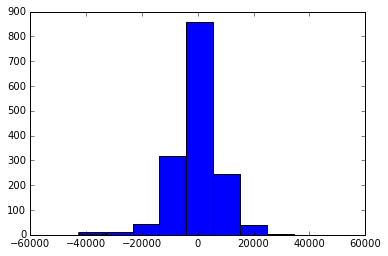

Distribution of prediction error on test data:


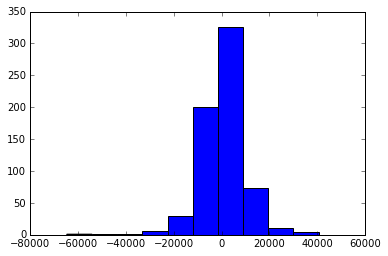

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [19]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 20193.8272361
Coefficients: 
 [ -2.04304955e+01   2.27528937e+03   1.06552081e+03 ...,   2.07320413e+00
   6.40272127e+00  -4.58300209e-01]
Residual sum of squares, training data: 0.00
Residual sum of squares, test data: 9908494149.85
Variance score, training data: 1.00
Distribution of prediction error on training data:


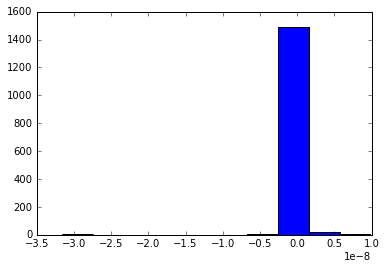

Distribution of prediction error on test data:


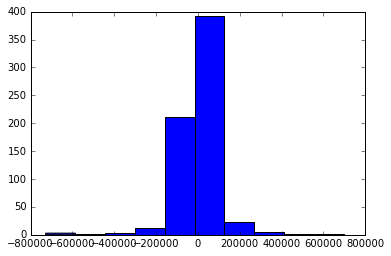

In [20]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 243500.929049
Coefficients: 
 [  9.93210784e+03  -1.67025292e+03  -5.15476721e+03  -4.84253860e+03
   1.48723576e+03   2.73574270e+03  -4.36751397e+03  -5.25571399e+03
  -3.04908862e+03   2.08702178e+03  -9.68774693e+02   2.89723660e+03
  -5.99111518e+03  -6.68749002e+03  -2.28466030e+03  -5.53177808e+03
  -3.33040767e+03  -6.86208327e+03  -2.81914330e+03  -3.86722636e+03
   1.66735175e+03   2.57648950e+03  -3.15073442e+03  -9.17429834e+02
  -3.82470465e+03  -2.43785447e+03  -2.43667950e+03  -5.35453515e+03
  -2.25789996e+02  -1.71124712e+03   1.35341000e+01   2.51667538e+03
  -1.46266211e+02   2.47913498e+03  -1.70060847e+03   8.13995542e+03
   2.87297697e+03   1.83243715e+02   1.93824858e+03   1.22876792e+04
   6.25846743e+03  -5.34806234e+03  -1.71408688e+02   1.71408743e+02
   4.65816950e+03   2.57539949e+03   1.76695865e+03   5.04721189e+02
  -1.49766402e+01  -3.91362129e+00   5.01912264e+00   1.52293141e+03
   2.51480350e+01   3.77277259e+02   2.31421749e+02   2.3428

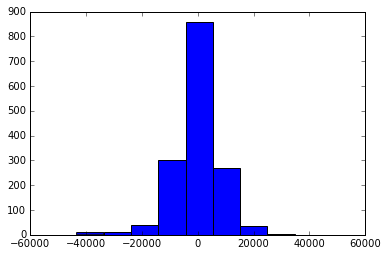

Distribution of prediction error on test data:


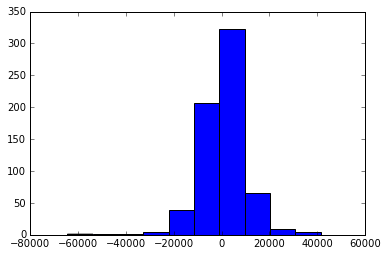

In [21]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

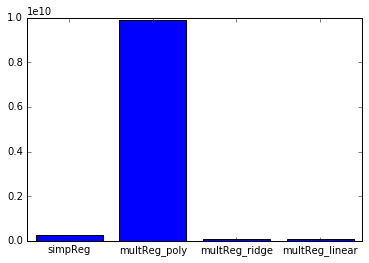

In [22]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()